# **Proyecto completo de Machine Learning**
## **Máster de FP en Inteligencia Artificial y Big Data**

<img src="./Images/logo-alan-turing.png" width="150"/>

Hecho por ***Elías Robles Ruiz***

## **Antecedentes**

Nos ha contactado la empresa *'AutoChollos S.A. (Siempre Ahorra)'* que se dedica a la compraventa de coches de segunda mano, han identificado que las subastas representan una buena oportunidad de negocio, debido a sus precios más bajos en comparación con las plataformas tradicionales de compraventa.

Por ello, nos han encargado la tarea de crear un modelo capaz de predecir los precios de los coches, para conocer a qué precio deberían venderlos.


## **Obtención de los datos y el por qué**

Para llevar a cabo el proyecto, hice una búsqueda en distintos lugares tales como:
* Kaggle
* Ayuntamientos de Málaga, Granada y Madrid
* Hugging Face
* Además de otras páginas menos conocidas con datasets

Tras investigar varios datasets públicos me decanté por uno de Kaggle de subastas de coches scrapeadas de fuentes de internet en el año 2015, para hacer el proyecto, aunque al principio no tenía claro qué dataset escoger. Finalmente me inventé una pequeña historia para darle contexto a la elección (de ahí la sección de Antecedentes, incluida después para justificarla).

**El dataset en cuestión:**

[https://www.kaggle.com/datasets/tunguz/used-car-auction-prices](https://www.kaggle.com/datasets/tunguz/used-car-auction-prices)

***Consideraciones previas:***

Para obtener los mismos resultados que se muestran sobre los modelos y los datos usar los siguientes archivos contenidos en `Models-Data-Import/`, lo único que hay que hacer es descargárselos y ponerlos en la raiz de los archivos.

Tal que así:

<img src="./Images/archivos-modelos-datos.png" />

### **Importaciones**

Importamos NumPy, Pandas, Matplotlib, Seaborn y Random por ahora.

In [57]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random

### **Carga de los datos**

In [58]:
# Intentamos cargar los datos en un Dataframe de Pandas
# como da error lo vamos a dejar comentado

# dataset = pd.read_csv("./Dataset/car_prices.csv")

Como podemos ver, el dataset tiene problemas. Por ahora vamos a omitir la línea que está mal y las posteriores, si es que las hay.

In [59]:
# Cargamos los datos en un Dataframe
dataset = pd.read_csv("./Dataset/car_prices.csv", on_bad_lines="skip")

Si vamos a la línea **408.163**, podemos ver que hay varias `,` que no corresponden con la estructura estándar de nuestro dataset.

<img src="./Images/fila-mala-dataset.png" />

Podemos observar que, de **558.838** filas en el CSV original, nos quedarían **558.811**. No hemos perdido una cantidad relevante de datos.

<img src="./Images/ultimas-filas-dataset.png" />

Se han eliminado **27 filas mal formateadas** debido al scraping. Estas filas no van a tener un efecto significativo en nuestro modelo, teniendo en cuenta la gran cantidad de registros que tenemos.


In [60]:
# Longitud actual del dataset

len(dataset)

558811

## **Descripción de los datos**

In [61]:
dataset.head()

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5.0,16639.0,white,black,"kia motors america, inc",20500,21500,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5.0,9393.0,white,beige,"kia motors america, inc",20800,21500,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,ca,4.5,1331.0,gray,black,financial services remarketing (lease),31900,30000,Thu Jan 15 2015 04:30:00 GMT-0800 (PST)
3,2015,Volvo,S60,T5,Sedan,automatic,yv1612tb4f1310987,ca,4.1,14282.0,white,black,volvo na rep/world omni,27500,27750,Thu Jan 29 2015 04:30:00 GMT-0800 (PST)
4,2014,BMW,6 Series Gran Coupe,650i,Sedan,automatic,wba6b2c57ed129731,ca,4.3,2641.0,gray,black,financial services remarketing (lease),66000,67000,Thu Dec 18 2014 12:30:00 GMT-0800 (PST)


In [62]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 558811 entries, 0 to 558810
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   year          558811 non-null  int64  
 1   make          548510 non-null  object 
 2   model         548412 non-null  object 
 3   trim          548160 non-null  object 
 4   body          545616 non-null  object 
 5   transmission  493458 non-null  object 
 6   vin           558811 non-null  object 
 7   state         558811 non-null  object 
 8   condition     547017 non-null  float64
 9   odometer      558717 non-null  float64
 10  color         558062 non-null  object 
 11  interior      558062 non-null  object 
 12  seller        558811 non-null  object 
 13  mmr           558811 non-null  int64  
 14  sellingprice  558811 non-null  int64  
 15  saledate      558811 non-null  object 
dtypes: float64(2), int64(3), object(11)
memory usage: 68.2+ MB


Aquí podemos ver todas las columnas de nuestro dataset y lo que contiene cada una:

| Campo | Descripción / ¿Qué hace? |
|:--:|:--|
| `year` | Año de fabricación del vehículo. |
| `make` | Marca del vehículo. |
| `model` | Modelo del vehículo. |
| `trim` | Versión o acabado del vehículo. |
| `body` | Tipo de carrocería. |
| `transmission` | Tipo de transmisión. |
| `vin` | Identificador único del vehículo. |
| `state` | Estado de EEUU donde se hizo la subasta. |
| `condition` | Estado general del vehículo. |
| `odometer` | Kilometraje del vehículo. |
| `color` | Color exterior del vehículo. |
| `interior` | Color o tipo del interior del vehículo. |
| `seller` | Vendedor del vehículo. |
| `mmr` | Precio estimado del mercado para ese vehículo en la subasta. |
| **`sellingprice`** | Precio final al que se vendió el vehículo (**target**). |
| `saledate` | Fecha y hora de la venta en subasta. |

Para nuestro objetivo, he determinado que las columnas más relevantes son:

`year`, `make`, `model`, `body`, `condition`, `odometer`, `mmr`

Nuestro target:

**`sellingprice`**

Columnas que podemos necesitar para ajustar aún más el precio:

`trim`, `transmission`, `color`, `interior`

Columnas prescindibles o innecesarias:

`vin`, `seller`, `state`, `saledate`

También se puede observar que en varias columnas hay datos faltantes o nulos, que habrá que rellenar de alguna forma o eliminar si afectan a la calidad del dataset.

## **Exploración y visualización de los datos**

Se realizará un estudio del dataset, buscando correlaciones, mostrando gráficas de diferente tipo, observando valores nulos y realizando otros análisis.

In [63]:
# Estilo base para todos los plots de sns.

sns.set_style("whitegrid")

### **Year (años)**
Primero vamos a examinar los datos que tenemos, comenzando por los años de fabricación. Para ello, utilizaremos un gráfico de barras que nos permita visualizar la distribución de los vehículos según su año de fabricación.

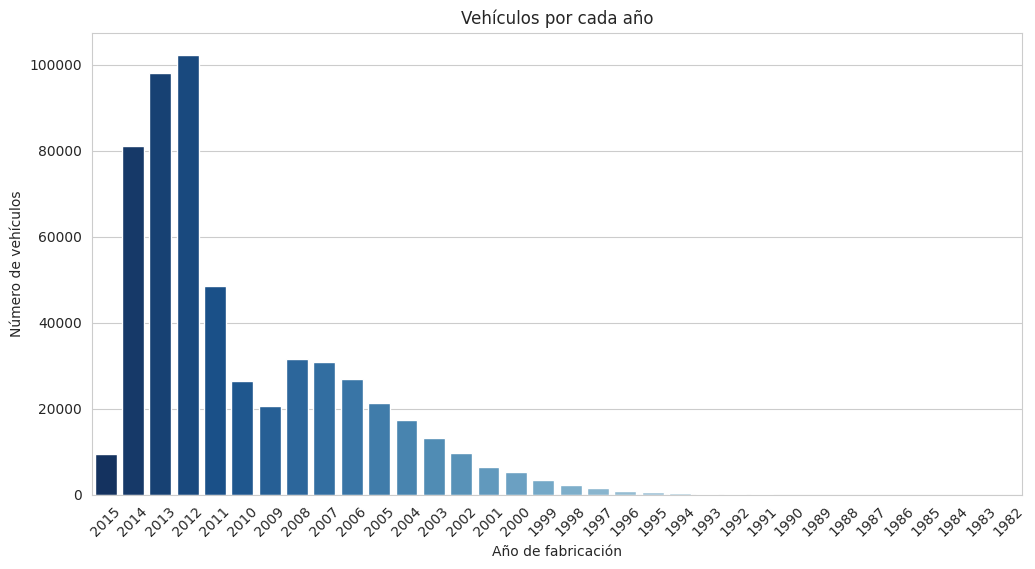

In [64]:
plt.figure(figsize=(12,6))
sns.countplot(x="year", data=dataset, palette="Blues", hue="year", legend=False)
plt.gca().invert_xaxis()
plt.title("Vehículos por cada año")
plt.xlabel("Año de fabricación")
plt.ylabel("Número de vehículos")
plt.xticks(rotation=45)
plt.show()

Podemos observar que la mayoría de los vehículos son de los últimos 10 años (desde 2015 hasta 2005).

### **Make (marca)**

La siguiente gráfica mostrará la distribución de las 30 marcas de vehículos más vendidas, pero antes vamos a revisar todas las marcas.

In [65]:
print(f"Hay {dataset["make"].nunique()} marcas distintas.")

dataset["make"].value_counts()

Hay 96 marcas distintas.


make
Ford          93554
Chevrolet     60197
Nissan        53946
Toyota        39871
Dodge         30710
              ...  
ford tk           1
chev truck        1
airstream         1
dot               1
Lotus             1
Name: count, Length: 96, dtype: int64

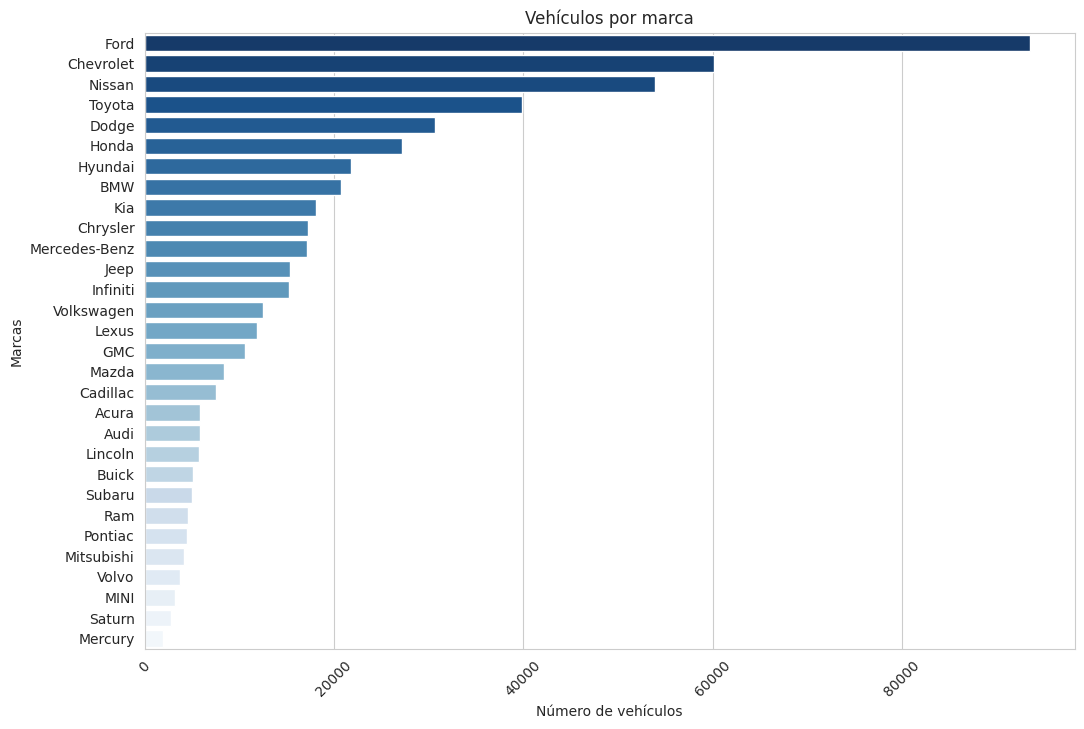

In [66]:
top_marcas = dataset["make"].value_counts().sort_values(ascending=False).head(30)

plt.figure(figsize=(12,8))
sns.barplot(x=top_marcas.values, y=top_marcas.index, hue=top_marcas.index, palette="Blues_r", legend=False)
plt.title("Vehículos por marca")
plt.xlabel("Número de vehículos")
plt.ylabel("Marcas")
plt.xticks(rotation=45)
plt.show()

Como podemos ver, la gráfica indica que unas pocas marcas representan la mayoría de los vehículos en el dataset.

### **Model (modelos)**

Ahora vamos a ver también los modelos más comunes.

In [67]:
print(f"Hay {dataset["model"].nunique()} modelos distintos.")

dataset["model"].value_counts()

Hay 973 modelos distintos.


model
Altima        19349
F-150         14479
Fusion        12946
Camry         12545
Escape        11861
              ...  
Q3                1
F-250             1
360               1
TLX               1
458 Italia        1
Name: count, Length: 973, dtype: int64

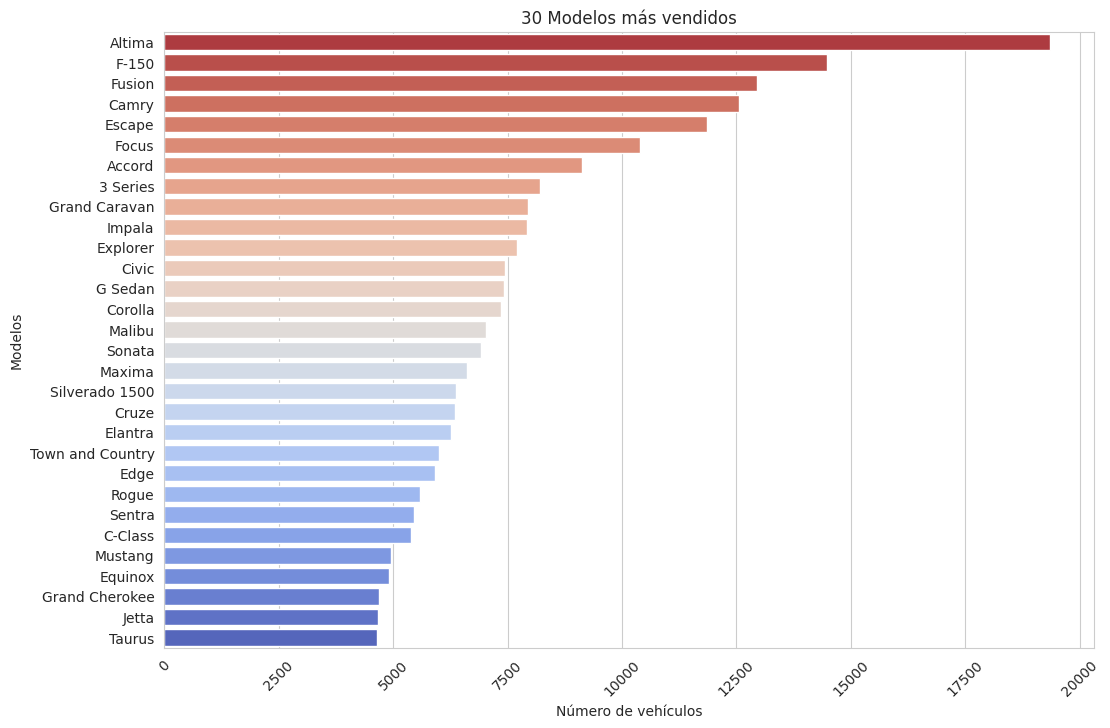

In [68]:
top_modelos = dataset["model"].value_counts().sort_values(ascending=False).head(30)

plt.figure(figsize=(12,8))
sns.barplot(x=top_modelos.values, y=top_modelos.index, hue=top_modelos.index, palette="coolwarm_r")
plt.title("30 Modelos más vendidos")
plt.xlabel("Número de vehículos")
plt.ylabel("Modelos")
plt.xticks(rotation=45)
plt.show()

La gráfica muestra que la distribución de los modelos es relativamente equilibrada, sin que ninguno concentre una cantidad especialmente alta de vehículos.

### **Body (carrocería)**

Ahora vamos a analizar también la distribución por tipo de carrocería.

In [69]:
print(f"Hay {dataset["body"].nunique()} carrocerías distintas.")

dataset["body"].value_counts()

Hay 86 carrocerías distintas.


body
Sedan          199437
SUV            119292
sedan           41906
suv             24552
Hatchback       21380
                ...  
Ram Van             1
CTS-V Wagon         1
g37 coupe           1
cab plus 4          1
cts wagon           1
Name: count, Length: 86, dtype: int64

Podemos ver que existen `sedan` y `Sedan`, así como `SUV` y `suv`, tendremos que unificar estos valores posteriormente.

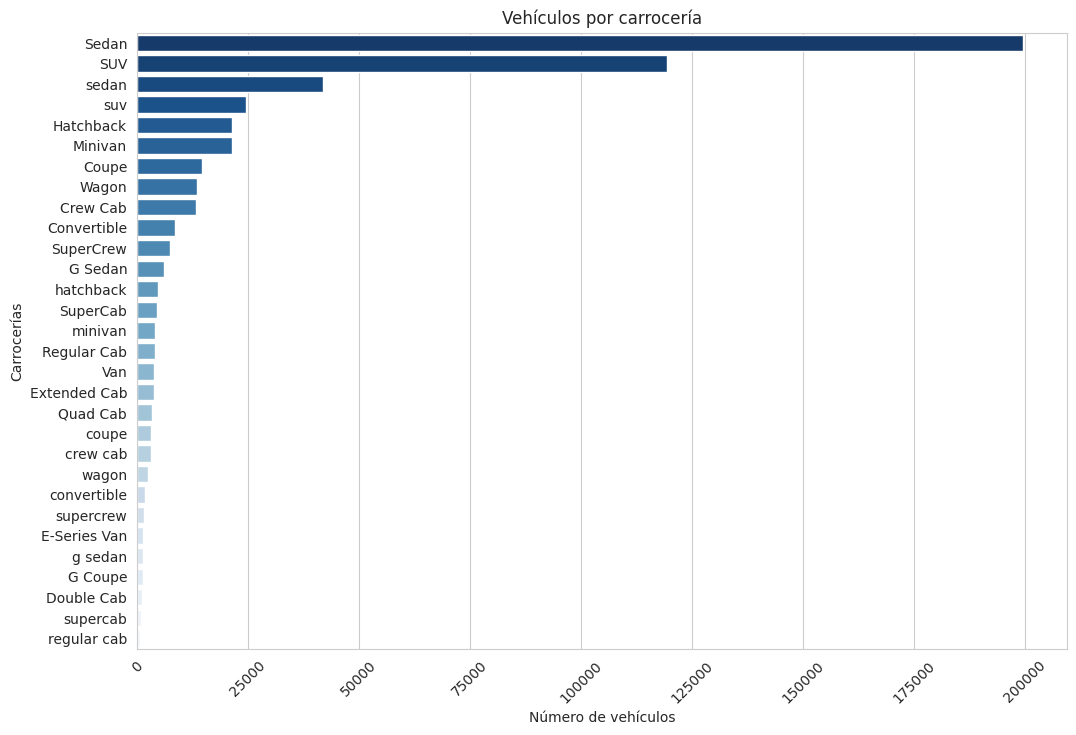

In [70]:
top_carroceria = dataset["body"].value_counts().sort_values(ascending=False).head(30)

plt.figure(figsize=(12,8))
sns.barplot(x=top_carroceria.values, y=top_carroceria.index, hue=top_carroceria.index, palette="Blues_r", legend=False)
plt.title("Vehículos por carrocería")
plt.xlabel("Número de vehículos")
plt.ylabel("Carrocerías")
plt.xticks(rotation=45)
plt.show()

La gráfica muestra que las primeras carrocerías representan prácticamente la mayor parte de los datos, aún sin considerar que algunos valores están escritos de manera diferente.

### **Condition (estado del vehículo)**

Ahora vamos a ver cómo está distribuido el estado de los vehículos.

In [71]:
dataset["condition"].value_counts()

condition
1.9    42281
3.5    26750
3.7    25938
4.4    25514
4.3    24937
4.2    24328
3.6    23144
4.1    23073
2.0    20790
4.0    19922
3.9    19920
2.8    19178
2.9    18928
3.8    18723
3.4    17398
2.7    16351
4.9    13099
4.8    12712
4.6    12634
2.5    12561
4.5    12313
2.6    11912
4.7    11363
5.0    11222
3.0    10803
3.3    10619
3.2     9962
2.4     9326
3.1     9222
2.1     9199
2.3     8188
1.0     7364
2.2     6057
1.8      323
1.7      243
1.6      178
1.5      144
1.4      134
1.2       95
1.1       87
1.3       82
Name: count, dtype: int64

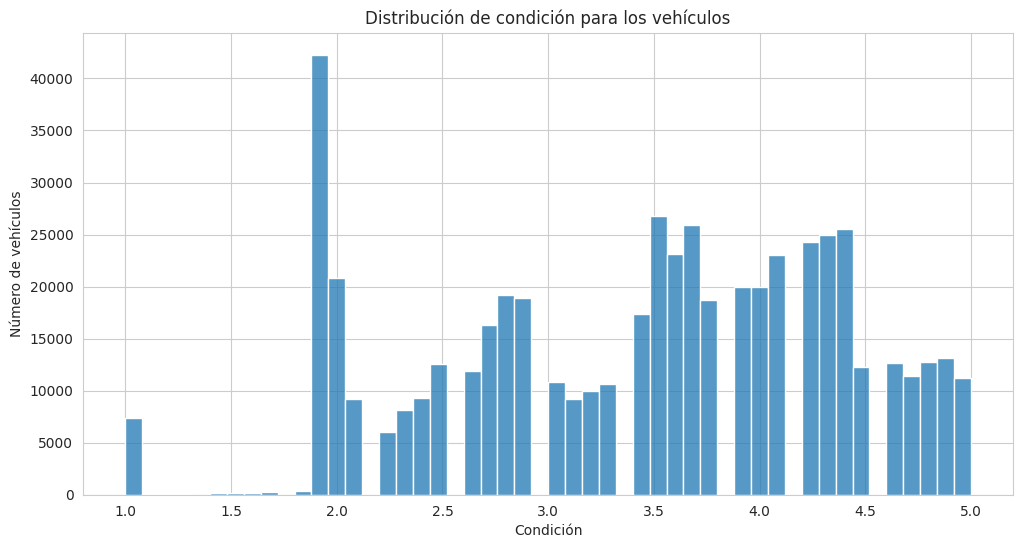

In [72]:
plt.figure(figsize=(12,6))
sns.histplot(dataset["condition"], bins=50)
plt.title("Distribución de condición para los vehículos")
plt.xlabel("Condición")
plt.ylabel("Número de vehículos")
plt.show()

Casi todos los valores se encuentran entre el 1.9 y el 5.0.

### **Odometer (kilometraje)**

Ahora vamos a analizar la distribución del kilometraje de los vehículos.

In [73]:
dataset["odometer"].value_counts().sort_index()

odometer
1.0         1315
2.0           12
3.0            9
4.0            9
5.0           16
            ... 
621388.0       1
694978.0       2
959276.0       1
980113.0       1
999999.0      72
Name: count, Length: 172277, dtype: int64

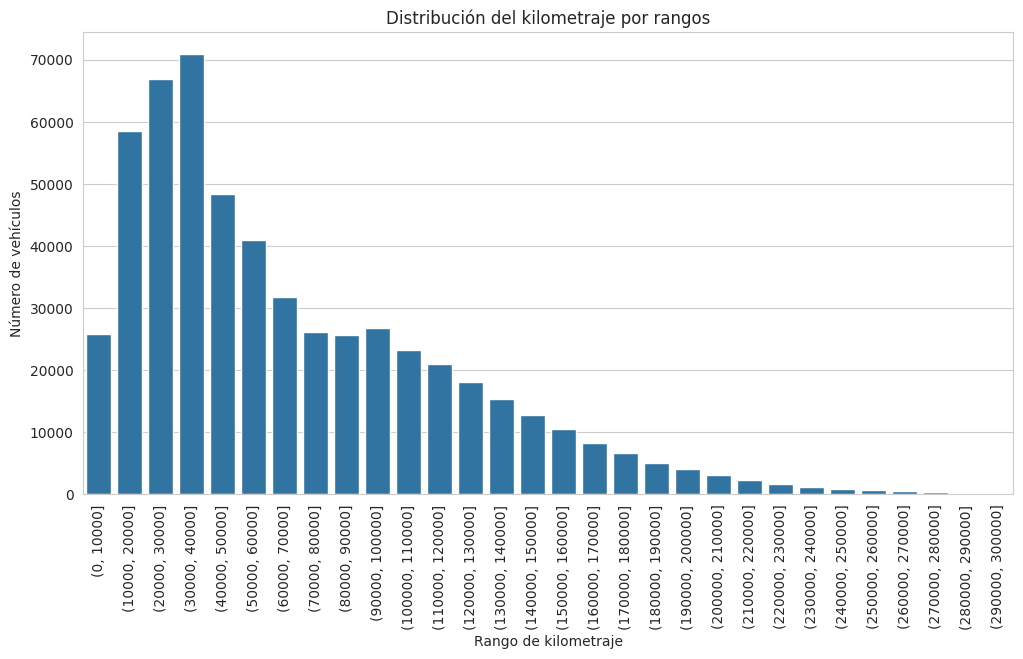

In [74]:
bins = range(0, 300001, 10000) # Crear rangos de 0 a 300.000 km, de 10.000 en 10.000
rango_kilometraje = pd.cut(dataset["odometer"], bins).value_counts().sort_index()

plt.figure(figsize=(12,6))
sns.barplot(x=rango_kilometraje.index, y=rango_kilometraje.values)
plt.xticks(rotation=90)
plt.title("Distribución del kilometraje por rangos")
plt.xlabel("Rango de kilometraje")
plt.ylabel("Número de vehículos")
plt.show()

En este caso, la mayoría de los vehículos están por debajo de 150.000 km.

### **MMR [Manheim Market Report] (Valor Estimado de Mercado)**

Nos disponemos a ver cómo están distribuidos los precios de nuestros vehículos.

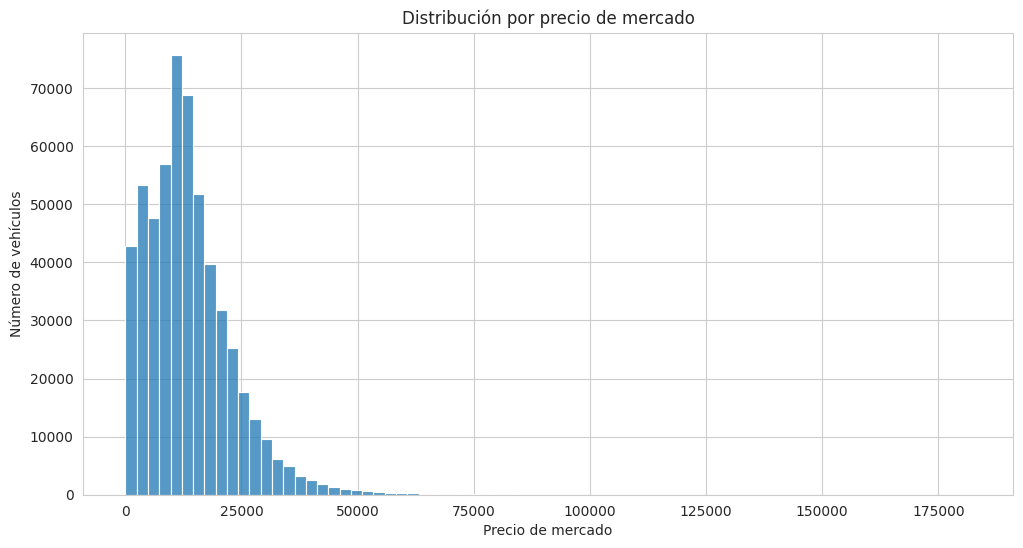

In [75]:
plt.figure(figsize=(12, 6))
sns.histplot(dataset["mmr"], bins=75)
plt.title("Distribución por precio de mercado")
plt.xlabel("Precio de mercado")
plt.ylabel("Número de vehículos")
plt.show()

La mayoría de los vehículos tienen un valor de 60.000 $ o menos.

Con esto hemos cubierto las principales columnas del dataset. Ahora vamos a revisar algunas gráficas más para entender mejor nuestros datos.

### **Transmission (Transmisiones)**

¿Qué tipos de transmisiones utilizan los vehículos?

In [76]:
dataset["transmission"].value_counts(dropna=False)

transmission
automatic    475914
NaN           65353
manual        17544
Name: count, dtype: int64

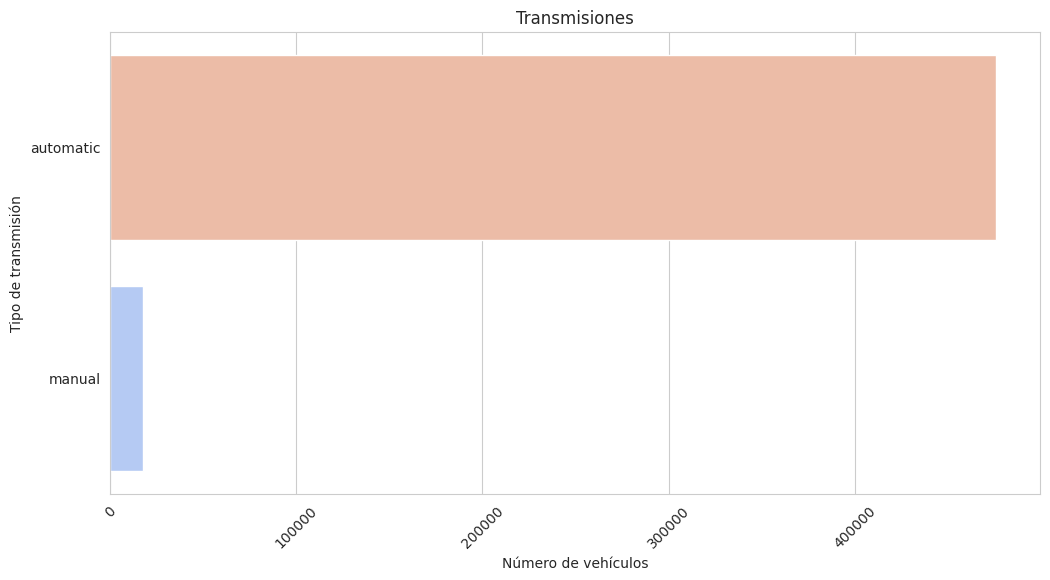

In [77]:
transmisiones = dataset["transmission"].value_counts()

plt.figure(figsize=(12,6))
sns.barplot(x=transmisiones.values, y=transmisiones.index, hue=transmisiones.index, palette="coolwarm_r")
plt.title("Transmisiones")
plt.xlabel("Número de vehículos")
plt.ylabel("Tipo de transmisión")
plt.xticks(rotation=45)
plt.show()

Casi todos los vehículos son automáticos.

### **Histograma**

Vamos a observar todos los campos numéricos para ver qué nos indican sus gráficas.

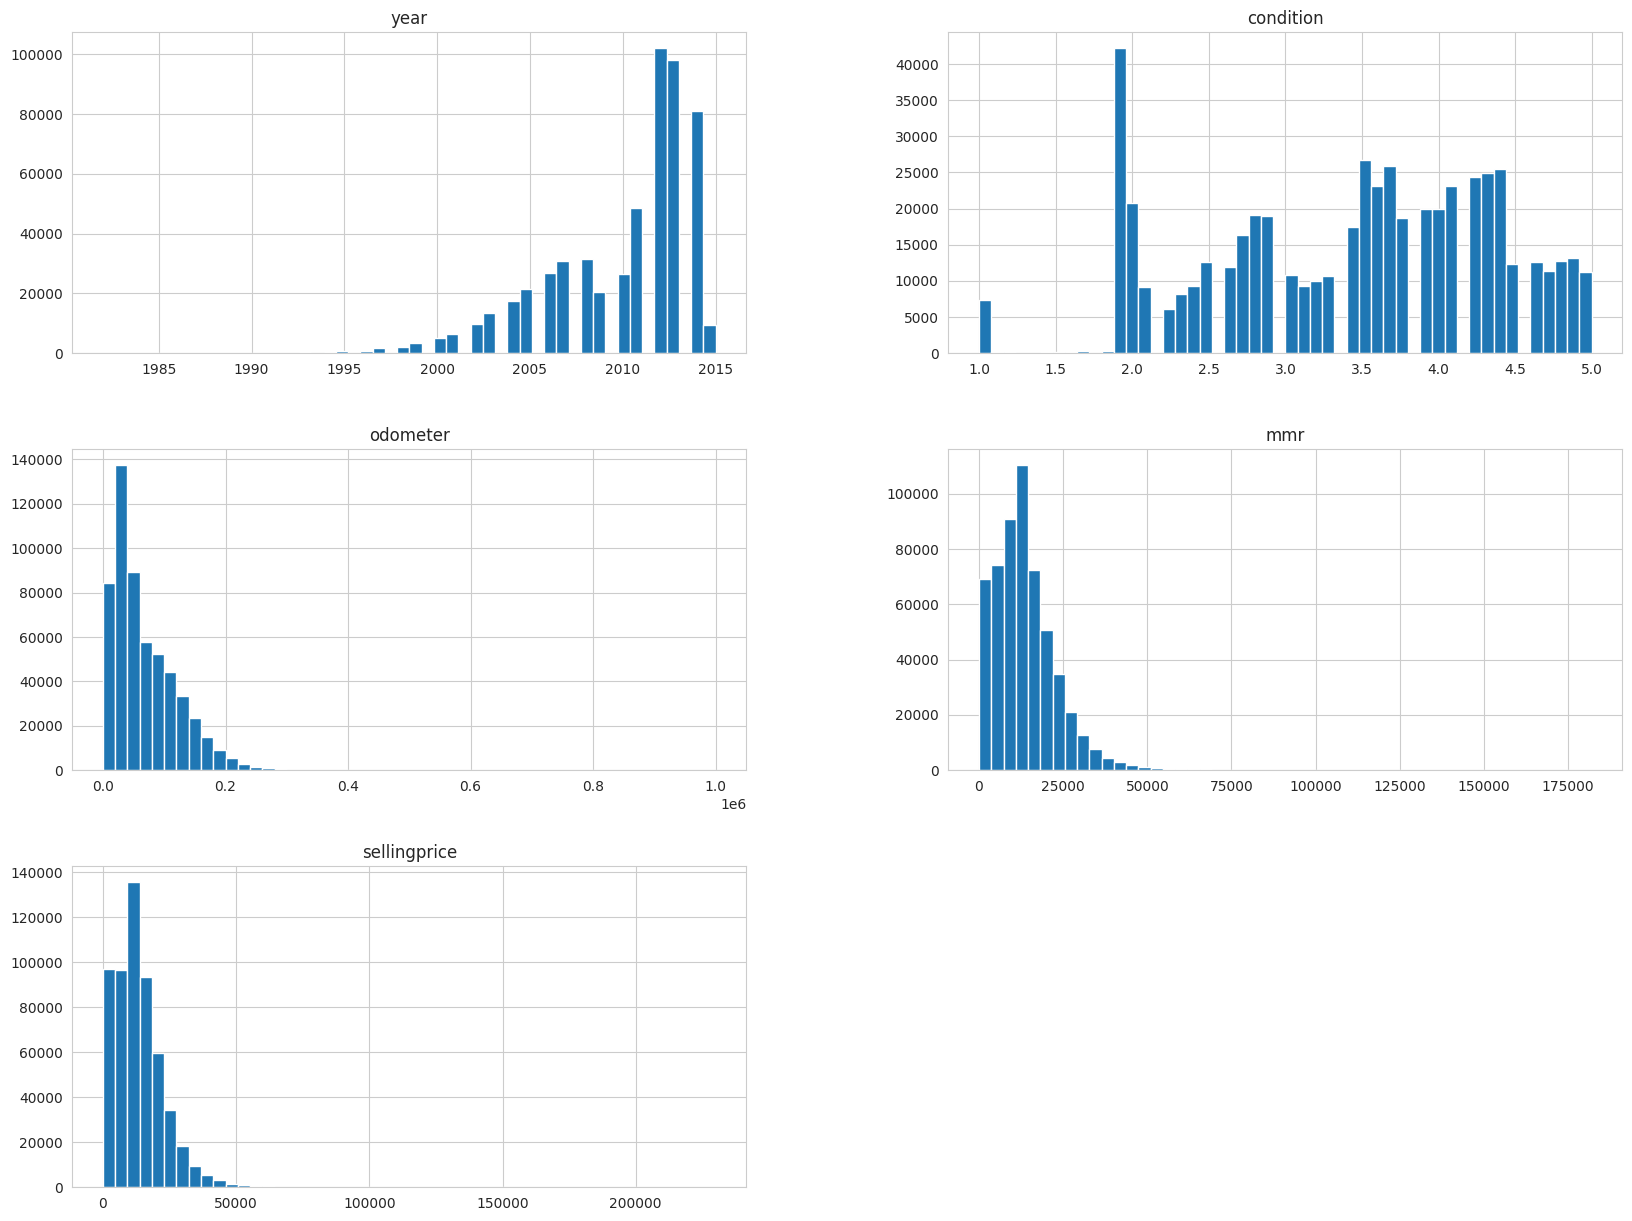

In [78]:
dataset.hist(bins=50, figsize=(20,15))
plt.show()

Se observa que las gráficas obtenidas dan valores similares a los ya obtenidos anteriormente.

## **El objetivo**

El objetivo de este proyecto es predecir el precio de venta de los vehículos a partir de sus características (año, marca, modelo, tipo de carrocería, condición, kilometraje, etc.).

Para ello, el target del modelo será la columna **`sellingprice`** del dataset, que es el precio final al que se vendió cada vehículo en la subasta.

## **Preparación de los datos**

El objetivo de esta sección es identificar valores anómalos y corregirlos, limpiar los datos que no estén bien formateados, rellenar los valores nulos o eliminarlos si afectan a la calidad del dataset. En resumen, se busca dejar el dataset lo más limpio y libre de ruido posible para que los algoritmos puedan aprender bien de los datos.

Para empezar, vamos a revisar las columnas que tenemos y los valores estadísticos de las columnas numéricas.

In [79]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 558811 entries, 0 to 558810
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   year          558811 non-null  int64  
 1   make          548510 non-null  object 
 2   model         548412 non-null  object 
 3   trim          548160 non-null  object 
 4   body          545616 non-null  object 
 5   transmission  493458 non-null  object 
 6   vin           558811 non-null  object 
 7   state         558811 non-null  object 
 8   condition     547017 non-null  float64
 9   odometer      558717 non-null  float64
 10  color         558062 non-null  object 
 11  interior      558062 non-null  object 
 12  seller        558811 non-null  object 
 13  mmr           558811 non-null  int64  
 14  sellingprice  558811 non-null  int64  
 15  saledate      558811 non-null  object 
dtypes: float64(2), int64(3), object(11)
memory usage: 68.2+ MB


In [80]:
dataset.describe()

,year,condition,odometer,mmr,sellingprice
count,558811.000000,547017.000000,558717.000000,558811.000000,558811.000000
mean,2010.038696,3.424512,68323.195797,13769.324646,13611.262461
std,3.966812,0.949439,53397.752933,9679.874607,9749.656919
min,1982.000000,1.000000,1.000000,25.000000,1.000000
25%,2007.000000,2.700000,28374.000000,7100.000000,6900.000000
50%,2012.000000,3.600000,52256.000000,12250.000000,12100.000000
75%,2013.000000,4.200000,99112.000000,18300.000000,18200.000000
max,2015.000000,5.000000,999999.000000,182000.000000,230000.000000


Para facilitar el procesamiento de los datos, vamos a diferenciar entre columnas de texto, columnas numéricas y la columna target.

In [81]:
text_cols = ["make", "model", "trim", "body", "transmission", "color", "interior"]
number_cols = ["year", "condition", "odometer", "mmr"]
target_col = "sellingprice"

Tenemos 16 columnas de las cuales vamos a eliminar las prescindibles.

* `vin`: No es relevante la identificación del vehículo en nuestro caso.
* `seller`: No importa quién lo venda en este caso.
* `saledate`: Tampoco importa cuándo se vendió.
* `state`: Tampoco importa el lugar de la subasta.

Estos datos podrían servir para elaborar estadísticas más avanzadas pero no son realmente importantes para predecir el precio de un vehículo.

In [82]:
dataset.drop(["vin", "seller", "saledate",  "state"], axis=1, inplace=True)

In [83]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 558811 entries, 0 to 558810
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   year          558811 non-null  int64  
 1   make          548510 non-null  object 
 2   model         548412 non-null  object 
 3   trim          548160 non-null  object 
 4   body          545616 non-null  object 
 5   transmission  493458 non-null  object 
 6   condition     547017 non-null  float64
 7   odometer      558717 non-null  float64
 8   color         558062 non-null  object 
 9   interior      558062 non-null  object 
 10  mmr           558811 non-null  int64  
 11  sellingprice  558811 non-null  int64  
dtypes: float64(2), int64(3), object(7)
memory usage: 51.2+ MB


Podemos ver que tenemos **558.811 registros en total**, vamos a ir arreglando y revisando los datos columna por columna.

Para evitar introducir datos ficticios y que cambien como estima el modelo vamos a eliminar los registros con nulos en los campos importantes.

In [84]:
dataset.dropna(subset=["year", "make", "model", "body", "condition", "odometer", "mmr"], inplace=True)

In [85]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 534292 entries, 0 to 558810
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   year          534292 non-null  int64  
 1   make          534292 non-null  object 
 2   model         534292 non-null  object 
 3   trim          534292 non-null  object 
 4   body          534292 non-null  object 
 5   transmission  472880 non-null  object 
 6   condition     534292 non-null  float64
 7   odometer      534292 non-null  float64
 8   color         533660 non-null  object 
 9   interior      533660 non-null  object 
 10  mmr           534292 non-null  int64  
 11  sellingprice  534292 non-null  int64  
dtypes: float64(2), int64(3), object(7)
memory usage: 53.0+ MB


Tras limpiar datos nulos, nos hemos quedado con **534.292 registros**.

Ahora vamos a intentar limpiar la columna de `transmission`, que tiene valores nulos, como vimos casi todas son "automáticas" pero vamos a cuantificar el cambio.

In [86]:
dataset["transmission"].value_counts(normalize=True)

transmission
automatic    0.965365
manual       0.034635
Name: proportion, dtype: float64

El 96.5% de los coches son automáticos, por lo cual no merece la pena rellenar con `"manual"`, así que lo vamos a rellenar con la moda `"automatic"`.

In [87]:
dataset["transmission"] = dataset["transmission"].fillna(dataset["transmission"].mode()[0])

Vamos a mirar de nuevo la proporción para ver cómo ha quedado, viéndolo así, el cambio es realmente imperceptible.

In [88]:
dataset["transmission"].value_counts(normalize=True)

transmission
automatic    0.969346
manual       0.030654
Name: proportion, dtype: float64

Si miramos la información, tenemos datos vacíos en `color` e `interior`, vamos a explorarlo y encontrar una forma de rellenarlo que no afecte a la veracidad de estos.

In [89]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 534292 entries, 0 to 558810
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   year          534292 non-null  int64  
 1   make          534292 non-null  object 
 2   model         534292 non-null  object 
 3   trim          534292 non-null  object 
 4   body          534292 non-null  object 
 5   transmission  534292 non-null  object 
 6   condition     534292 non-null  float64
 7   odometer      534292 non-null  float64
 8   color         533660 non-null  object 
 9   interior      533660 non-null  object 
 10  mmr           534292 non-null  int64  
 11  sellingprice  534292 non-null  int64  
dtypes: float64(2), int64(3), object(7)
memory usage: 53.0+ MB


Vamos a observar las columnas `color` e `interior`, vamos a revisar sus valores y sustituir con aproximadamente el 90% de los principales valores.

In [90]:
print(dataset["color"].value_counts(dropna=False, normalize=True),
      "-------------------------",
      dataset["interior"].value_counts(dropna=False, normalize=True),
      sep="\n"
     )

color
black        0.199516
white        0.190602
gray         0.149738
silver       0.148829
blue         0.090836
red          0.077926
—            0.045614
gold         0.019598
green        0.019392
beige        0.016079
burgundy     0.015911
brown        0.012153
orange       0.003631
purple       0.002764
off-white    0.002617
yellow       0.002238
NaN          0.001183
charcoal     0.000868
turquoise    0.000402
pink         0.000077
lime         0.000026
Name: proportion, dtype: float64
-------------------------
interior
black        0.446700
gray         0.318979
beige        0.108308
tan          0.078053
—            0.021385
brown        0.015527
red          0.002429
silver       0.001971
blue         0.001896
NaN          0.001183
off-white    0.000878
purple       0.000610
gold         0.000586
white        0.000447
green        0.000417
burgundy     0.000344
orange       0.000251
yellow       0.000036
Name: proportion, dtype: float64


Tras analizar los datos detenidamente, los datos podemos ver 2 cosas: hay valores `"—"`, que también rellenaremos porque no sabemos que son.

Para los colores exteriores de los vehículos tenemos `"black"`, `"white"`, `"gray"`, `"silver"`, `"blue"`, `"red"`.

Para los colores del interior tenemos `"black"`, `"gray"`, `"beige"`, `"tan"`.

Para rellenar de forma aleatoria, hemos creado una función que elige un valor para asignarlo.

In [91]:
color_m_values = ["black", "white", "gray", "silver", "blue", "red"]
interior_m_values = ["black", "gray", "beige", "tan"]

def random_main_value(values):
    return random.choice(values)

Ahora vamos a rellenar tanto los `"—"` como los nulos.

In [92]:
# Rellenar nulos
dataset.loc[dataset["color"].isna(), "color"] = dataset.loc[dataset["color"].isna(), "color"].apply(lambda _: random_main_value(color_m_values))
dataset.loc[dataset["interior"].isna(), "interior"] = dataset.loc[dataset["interior"].isna(), "interior"].apply(lambda _: random_main_value(interior_m_values))

# Reemplazar "—"
dataset.loc[dataset["color"] == "—", "color"] = dataset.loc[dataset["color"] == "—", "color"].apply(lambda _: random_main_value(color_m_values))
dataset.loc[dataset["interior"] == "—", "interior"] = dataset.loc[dataset["interior"] == "—", "interior"].apply(lambda _: random_main_value(interior_m_values))


Se puede ver que las proporciones ya están correctas y no hay valores anómalos.

In [93]:
print(dataset["color"].value_counts(dropna=False, normalize=True),
      "-------------------------",
      dataset["interior"].value_counts(dropna=False, normalize=True),
      sep="\n"
     )

color
black        0.207340
white        0.198275
gray         0.157573
silver       0.156602
blue         0.098695
red          0.085758
gold         0.019598
green        0.019392
beige        0.016079
burgundy     0.015911
brown        0.012153
orange       0.003631
purple       0.002764
off-white    0.002617
yellow       0.002238
charcoal     0.000868
turquoise    0.000402
pink         0.000077
lime         0.000026
Name: proportion, dtype: float64
-------------------------
interior
black        0.452367
gray         0.324471
beige        0.113981
tan          0.083789
brown        0.015527
red          0.002429
silver       0.001971
blue         0.001896
off-white    0.000878
purple       0.000610
gold         0.000586
white        0.000447
green        0.000417
burgundy     0.000344
orange       0.000251
yellow       0.000036
Name: proportion, dtype: float64


In [94]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 534292 entries, 0 to 558810
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   year          534292 non-null  int64  
 1   make          534292 non-null  object 
 2   model         534292 non-null  object 
 3   trim          534292 non-null  object 
 4   body          534292 non-null  object 
 5   transmission  534292 non-null  object 
 6   condition     534292 non-null  float64
 7   odometer      534292 non-null  float64
 8   color         534292 non-null  object 
 9   interior      534292 non-null  object 
 10  mmr           534292 non-null  int64  
 11  sellingprice  534292 non-null  int64  
dtypes: float64(2), int64(3), object(7)
memory usage: 53.0+ MB


Lo siguiente que vamos a limpiar van a ser las carrocerias.

In [95]:
dataset["body"].value_counts()

body
Sedan          194880
SUV            116104
sedan           41880
suv             24551
Hatchback       20912
                ...  
CTS-V Wagon         1
Ram Van             1
g37 coupe           1
cab plus 4          1
cts wagon           1
Name: count, Length: 86, dtype: int64

Al revisar los datos hemos detectado duplicados en la columna de `body` debido a diferencias de escritura (mayúsculas o minúsculas). Vamos a corregirlo para que no se consideren categorías distintas cuando realmente son iguales.

Aprovecharemos para aplicar el mismo procedimiento a todas las columnas de texto, por si existen otras diferencias que puedan reagruparse.

In [96]:
for tc in text_cols:
    dataset[tc] = dataset[tc].str.title()

Vamos a ver cómo han quedado los distintos campos después de hacer el procedimiento en todas las columnas de texto por si hay diferencias que se reagrupen.

In [97]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 534292 entries, 0 to 558810
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   year          534292 non-null  int64  
 1   make          534292 non-null  object 
 2   model         534292 non-null  object 
 3   trim          534292 non-null  object 
 4   body          534292 non-null  object 
 5   transmission  534292 non-null  object 
 6   condition     534292 non-null  float64
 7   odometer      534292 non-null  float64
 8   color         534292 non-null  object 
 9   interior      534292 non-null  object 
 10  mmr           534292 non-null  int64  
 11  sellingprice  534292 non-null  int64  
dtypes: float64(2), int64(3), object(7)
memory usage: 53.0+ MB


In [98]:
for tc in text_cols:
    print(dataset[tc].value_counts())

make
Ford             92097
Chevrolet        58848
Nissan           53132
Toyota           38999
Dodge            30114
Honda            26378
Hyundai          21484
Bmw              20220
Kia              17871
Chrysler         16923
Mercedes-Benz    16786
Infiniti         15179
Jeep             15015
Volkswagen       12178
Lexus            11672
Gmc              10322
Mazda             8173
Cadillac          7253
Acura             5737
Audi              5722
Lincoln           5640
Subaru            4935
Buick             4930
Ram               4545
Pontiac           4245
Mitsubishi        4030
Volvo             3632
Mini              3174
Saturn            2657
Mercury           1894
Land Rover        1708
Scion             1647
Jaguar            1377
Porsche           1361
Suzuki            1027
Fiat               857
Hummer             786
Saab               453
Smart              389
Oldsmobile         333
Isuzu              188
Maserati           131
Bentley            115
Aston 

Ya tenemos los datos más agrupados pero vamos a ver cuantos valores quedan mál en el dataset.

In [99]:
dataset.isna().sum()

year            0
make            0
model           0
trim            0
body            0
transmission    0
condition       0
odometer        0
color           0
interior        0
mmr             0
sellingprice    0
dtype: int64

In [100]:
(dataset == "—").sum()

year            0
make            0
model           0
trim            0
body            0
transmission    0
condition       0
odometer        0
color           0
interior        0
mmr             0
sellingprice    0
dtype: int64

Vamos a revisar si quedan aún más valores anómalos.

In [101]:
dataset.loc[dataset["odometer"] < 0]

,year,make,model,trim,body,transmission,condition,odometer,color,interior,mmr,sellingprice


In [102]:
dataset.loc[(dataset["year"] < 1980) | (dataset["year"] > 2025)]

,year,make,model,trim,body,transmission,condition,odometer,color,interior,mmr,sellingprice


In [103]:
dataset.loc[(dataset["condition"] < 0) | (dataset["condition"] > 5)]

,year,make,model,trim,body,transmission,condition,odometer,color,interior,mmr,sellingprice


### **Correlaciones**

Como ya tenemos los datos limpios, vamos a ver más métricas relevantes para el objetivo.

In [104]:
corr_matrix = dataset.corr(numeric_only=True)
corr_matrix

,year,condition,odometer,mmr,sellingprice
year,1.000000,0.547574,-0.774981,0.588418,0.578503
condition,0.547574,1.000000,-0.535770,0.480369,0.534917
odometer,-0.774981,-0.535770,1.000000,-0.581210,-0.575987
mmr,0.588418,0.480369,-0.581210,1.000000,0.983717
sellingprice,0.578503,0.534917,-0.575987,0.983717,1.000000


Con esto, podemos ver la correlación de los atributos con el valor de los vehículos.

In [105]:
corr_matrix["sellingprice"].sort_values(ascending=False)

sellingprice    1.000000
mmr             0.983717
year            0.578503
condition       0.534917
odometer       -0.575987
Name: sellingprice, dtype: float64

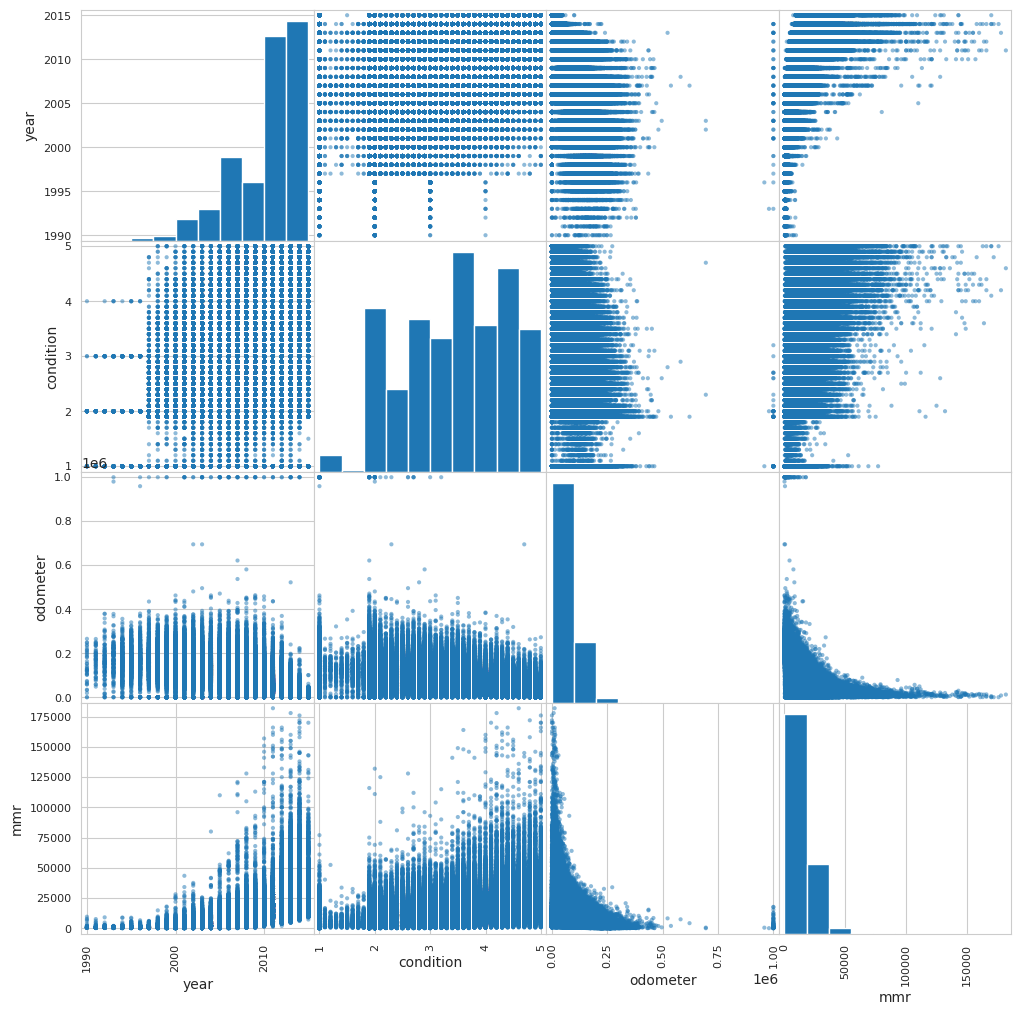

In [106]:
from pandas.plotting import scatter_matrix

scatter_matrix(dataset[number_cols], figsize=(12, 12))
plt.show()

Ahora, vamos a ver el mapa de calor de la matriz de correlación, mientras más cercano a 1 sea el valor más relacionado están entre ellos.

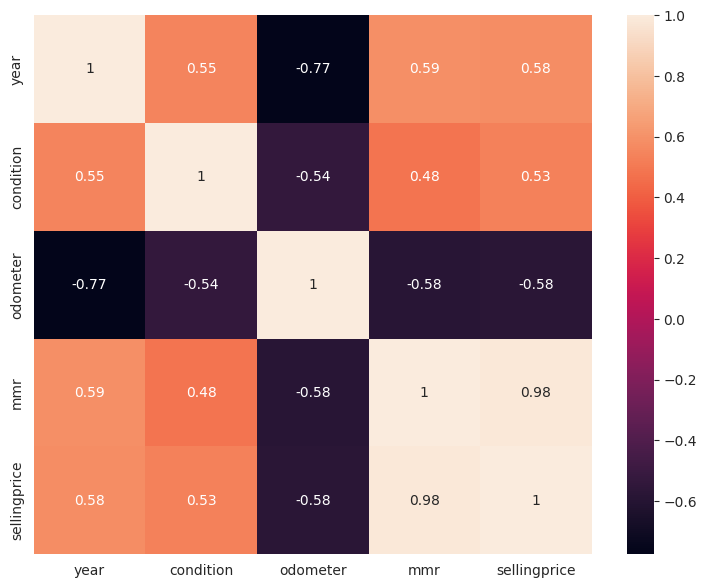

In [107]:
plt.figure(figsize=(9,7))
sns.heatmap(corr_matrix, annot=True)
plt.show()

### **Transformación de los datos**
Ya hemos terminado de preparar los datos, y mostrar las pertinentes gráficas. Ahora vamos a transformar los textos en números y decirle a nuestro codificador como tratar a los textos que no conoce.

#### **Importaciones**

Vamos a importar el preprocesador de texto **OrdinalEncoder**, ya que nos permite transformar variables de texto en valores numéricos para que el algoritmo pueda trabajar correctamente con ellas.  
Además, vamos a dejarlo configurado desde el principio para aplicarlo durante el preprocesado.

Documentación oficial:  
https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OrdinalEncoder.html


In [108]:
# Herramientas
import os
from joblib import dump, load

from sklearn.preprocessing import OrdinalEncoder

encoder = OrdinalEncoder(
    handle_unknown="use_encoded_value",  # codifica categorías nuevas durante predicción
    unknown_value=-1,                    # valor asignado a categorías desconocidas
    dtype="int32"                        # tipo entero
)

#### **Preprocesamiento de los datos**
Ponemos a preprocesar los datos para que el modelo sea capaz de ingerirlos correctamente.

In [109]:
from sklearn.model_selection import train_test_split

# Ajustamos el encoder con las columnas de texto
encoder.fit(dataset[text_cols])

# Transformamos las columnas a número
X_text = encoder.transform(dataset[text_cols])
X_text = X_text.astype("int32")

X_num = dataset[number_cols].astype("float32").values

# Unimos las columnas numéricas y de texto
X = np.hstack([X_num, X_text])

# Target (precio de venta)
y = dataset[target_col].values

X_train_file = "./Models-Data-Import/X_train.joblib"
X_test_file = "./Models-Data-Import/X_test.joblib"
y_train_file = "./Models-Data-Import/y_train.joblib"
y_test_file = "./Models-Data-Import/y_test.joblib"

if (os.path.exists(X_train_file) and
    os.path.exists(X_test_file) and
    os.path.exists(y_train_file) and
    os.path.exists(y_test_file)):

    print("Cargando datasets procesados...")
    X_train = load(X_train_file)
    X_test  = load(X_test_file)
    y_train = load(y_train_file)
    y_test  = load(y_test_file)

else:
    print("Datasets procesados no encontrados.")
    print("Generando splits y guardándolos...")
    # Dividimos los datos en entrenamiento y test
    # test_size=0.1 - 10% de los datos para test
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.1
    )

    # Guardar todo
    dump(X_train, X_train_file)
    dump(X_test,  X_test_file)
    dump(y_train, y_train_file)
    dump(y_test,  y_test_file)

    print("Datasets guardados correctamente.")

print("Datos listos:", X_train.shape[0], "para entrenar,", X_test.shape[0], "para test")

Cargando datasets procesados...
Datos listos: 480862 para entrenar, 53430 para test


## **Entrenamiento de los modelos**

He elegido para este caso los siguientes modelos.

* DecissionTreeRegressor
* DecissionTreeRegressor (limitado)
* RandomForestRegressor
* RandomForestRegressor (limitado)
* LinearRegression
* Ridge

### **Importaciones**

Vamos a importar los modelos, herramienta de exportación, y otras cosas necesarias para medir la precisión.

In [110]:
# Modelos
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression, Ridge

# Métricas y medición de errores
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_absolute_percentage_error
from sklearn.model_selection import cross_val_score

Para evaluar los modelos, vamos a crear una función genérica que nos permita ver los errores de cada uno de ellos.

In [111]:
def obtener_metricas_precision(modelo, X_test, y_test):

    # Predicción
    y_pred = modelo.predict(X_test)

    # Métricas
    mae = mean_absolute_error(y_test, y_pred)
    mape = mean_absolute_percentage_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print(f"MAE: {mae:.2f}, MAPE: {mape*100:.2f}%, MSE: {mse:.2f}, R²: {r2:.3f}")

    print(f"Primeros 20 errores (real vs predicho vs abs error):")
    for i in range(20):
        r = y_test[i]
        e = y_pred[i]
        e_abs = abs(r - e)
        print(f"{r:10.2f}   {e:14.2f}   {e_abs:14.2f}")

    return {"MAE": mae, "MAPE": mape * 100, "MSE": mse, "R2": r2}

### **DecissionTreeRegressor**

Procedemos a entrenar el modelo de arbol de decisión.

In [112]:
dtr_file = "./Models-Data-Import/decision_tree_model.joblib"

if os.path.exists(dtr_file):
    print("Cargando DecisionTreeRegressor")
    decision_tree = load(dtr_file)

else:
    print("DecisionTreeRegressor no encontrado.")
    print("Se va a proceder a entrenar de nuevo.")
    decision_tree = DecisionTreeRegressor(random_state=2812)
    decision_tree.fit(X_train, y_train)
    dump(decision_tree, dtr_file)
    print("Se ha entrenado y guardado DecisionTreeRegressor.")

dtr_precision = obtener_metricas_precision(decision_tree, X_test, y_test)

Cargando DecisionTreeRegressor
MAE: 165.40, MAPE: 2.04%, MSE: 521069.56, R²: 0.995
Primeros 20 errores (real vs predicho vs abs error):
   6200.00          6200.00             0.00
  30250.00         30250.00             0.00
   3100.00          3100.00             0.00
  31000.00         31000.00             0.00
  13600.00         13600.00             0.00
  10800.00         10800.00             0.00
  10700.00         10700.00             0.00
   9700.00          9700.00             0.00
  35500.00         35500.00             0.00
  17500.00         19800.00          2300.00
  38000.00         38000.00             0.00
   6700.00          6700.00             0.00
    800.00           800.00             0.00
  13900.00         13900.00             0.00
  18300.00         18300.00             0.00
   5500.00          5500.00             0.00
  20100.00         20100.00             0.00
  10400.00         10400.00             0.00
  18800.00         18800.00             0.00
  22800.0

### **DecissionTreeRegressor Limitado**

Ahora vamos a entrenar el modelo de arbol de decisión limitado.

In [113]:
dtr_lim_file = "./Models-Data-Import/decision_tree_limitado_model.joblib"

if os.path.exists(dtr_lim_file):
    print("Cargando DecisionTreeRegressor limitado")
    decision_tree_limitado = load(dtr_lim_file)

else:
    print("DecisionTreeRegressor limitado no encontrado.")
    print("Se va a proceder a entrenar de nuevo.")
    decision_tree_limitado = DecisionTreeRegressor(max_depth=20, random_state=2812)
    decision_tree_limitado.fit(X_train, y_train)
    dump(decision_tree_limitado, dtr_lim_file)
    print("Se ha entrenado y guardado DecisionTreeRegressor limitado.")

dtr_lim_precision = obtener_metricas_precision(decision_tree_limitado, X_test, y_test)

Cargando DecisionTreeRegressor limitado
MAE: 659.57, MAPE: 8.71%, MSE: 1176167.47, R²: 0.988
Primeros 20 errores (real vs predicho vs abs error):
   6200.00          6200.00             0.00
  30250.00         30235.71            14.29
   3100.00          2642.14           457.86
  31000.00         31743.75           743.75
  13600.00         16153.85          2553.85
  10800.00          9108.24          1691.76
  10700.00         10240.62           459.38
   9700.00          9700.00             0.00
  35500.00         36310.00           810.00
  17500.00         17500.00             0.00
  38000.00         42500.00          4500.00
   6700.00          6600.00           100.00
    800.00          1430.30           630.30
  13900.00         15800.00          1900.00
  18300.00         17673.56           626.44
   5500.00          4120.00          1380.00
  20100.00         20100.00             0.00
  10400.00          9869.23           530.77
  18800.00         19345.00           545.00

### **RandomForestRegressor**

Vamos a entrenar el Random Forest.

In [114]:
rf_file = "./Models-Data-Import/random_forest_model.joblib"

if os.path.exists(rf_file):
    print("Cargando RandomForestRegressor")
    random_forest = load(rf_file)

else:
    print("RandomForestRegressor no encontrado.")
    print("Se va a proceder a entrenar de nuevo.")
    random_forest = RandomForestRegressor(n_estimators=10, random_state=2812, n_jobs=-1)
    random_forest.fit(X_train, y_train)
    dump(random_forest, rf_file)
    print("Se ha entrenado y guardado RandomForestRegressor.")

rf_precision = obtener_metricas_precision(random_forest, X_test, y_test)

Cargando RandomForestRegressor
MAE: 476.17, MAPE: 6.32%, MSE: 940931.24, R²: 0.990
Primeros 20 errores (real vs predicho vs abs error):
   6200.00          6030.00           170.00
  30250.00         30250.00             0.00
   3100.00          2860.00           240.00
  31000.00         30355.00           645.00
  13600.00         14630.00          1030.00
  10800.00          9480.00          1320.00
  10700.00         10350.00           350.00
   9700.00          9660.00            40.00
  35500.00         35200.00           300.00
  17500.00         17335.00           165.00
  38000.00         39545.00          1545.00
   6700.00          6720.00            20.00
    800.00          1040.00           240.00
  13900.00         15150.00          1250.00
  18300.00         18070.00           230.00
   5500.00          5270.00           230.00
  20100.00         20260.00           160.00
  10400.00         10460.00            60.00
  18800.00         19330.00           530.00
  22800.0

### **RandomForestRegressor Limitado**

Entrenamos el Random Forest limitado.

In [115]:
rf_lim_file = "./Models-Data-Import/random_forest_limitado_model.joblib"

if os.path.exists(rf_lim_file):
    print("Cargando RandomForestRegressor limitado")
    random_forest_limitado = load(rf_lim_file)

else:
    print("RandomForestRegressor limitado no encontrado.")
    print("Se va a proceder a entrenar de nuevo.")
    random_forest_limitado = RandomForestRegressor(
        n_estimators=20,
        max_depth=22,
        min_samples_split=2,
        random_state=2812,
        n_jobs=-1
        )
    random_forest_limitado.fit(X_train, y_train)
    dump(random_forest_limitado, rf_lim_file)
    print("Se ha entrenado y guardado RandomForestRegressor limitado.")

rf_lim_precision = obtener_metricas_precision(random_forest_limitado, X_test, y_test)

Cargando RandomForestRegressor limitado
MAE: 618.32, MAPE: 8.30%, MSE: 1117586.34, R²: 0.988
Primeros 20 errores (real vs predicho vs abs error):
   6200.00          5763.42           436.58
  30250.00         30113.06           136.94
   3100.00          2651.93           448.07
  31000.00         30382.08           617.92
  13600.00         15401.93          1801.93
  10800.00          9771.84          1028.16
  10700.00         10280.95           419.05
   9700.00          9261.09           438.91
  35500.00         35774.04           274.04
  17500.00         17343.63           156.37
  38000.00         40265.06          2265.06
   6700.00          6325.52           374.48
    800.00          1137.30           337.30
  13900.00         14908.26          1008.26
  18300.00         17649.93           650.07
   5500.00          4872.13           627.87
  20100.00         20014.97            85.03
  10400.00         10722.54           322.54
  18800.00         19424.98           624.98

### **LinearRegression**

Vamos a entrenar el modelo de regresión lineal.

In [116]:
lr_file = "./Models-Data-Import/linear_regression_model.joblib"

if os.path.exists(lr_file):
    print("Cargando LinearRegression")
    linear_regression = load(lr_file)

else:
    print("LinearRegression no encontrado.")
    print("Se va a proceder a entrenar de nuevo.")
    linear_regression = LinearRegression()
    linear_regression.fit(X_train, y_train)
    dump(linear_regression, lr_file)
    print("Se ha entrenado y guardado LinearRegression.")

lr_precision = obtener_metricas_precision(linear_regression, X_test, y_test)

Cargando LinearRegression
MAE: 979.89, MAPE: 14.26%, MSE: 3076344.71, R²: 0.968
Primeros 20 errores (real vs predicho vs abs error):
   6200.00          4905.19          1294.81
  30250.00         31511.00          1261.00
   3100.00          2690.19           409.81
  31000.00         29305.04          1694.96
  13600.00         16707.92          3107.92
  10800.00          9466.00          1334.00
  10700.00         10025.65           674.35
   9700.00          9676.76            23.24
  35500.00         36304.49           804.49
  17500.00         18094.92           594.92
  38000.00         41098.53          3098.53
   6700.00          5874.38           825.62
    800.00           869.11            69.11
  13900.00         15056.17          1156.17
  18300.00         16716.66          1583.34
   5500.00          4345.72          1154.28
  20100.00         20701.06           601.06
  10400.00         10624.73           224.73
  18800.00         19719.31           919.31
  22800.00  

### **RidgeRegression**

Vamos a proceder a entrenar el modelo de regresión Ridge.

In [117]:
r_file = "./Models-Data-Import/ridge_regression_model.joblib"

if os.path.exists(r_file):
    print("Cargando Ridge Regression")
    ridge_regression = load(r_file)

else:
    print("Ridge Regression no encontrado.")
    print("Se va a proceder a entrenar de nuevo.")
    ridge_regression = Ridge(alpha=100.0)
    ridge_regression.fit(X_train, y_train)
    dump(ridge_regression, r_file)
    print("Se ha entrenado y guardado Ridge Regression.")

r_precision = obtener_metricas_precision(ridge_regression, X_test, y_test)

Cargando Ridge Regression
MAE: 979.86, MAPE: 14.25%, MSE: 3076335.20, R²: 0.968
Primeros 20 errores (real vs predicho vs abs error):
   6200.00          4905.17          1294.83
  30250.00         31513.17          1263.17
   3100.00          2690.27           409.73
  31000.00         29305.07          1694.93
  13600.00         16707.69          3107.69
  10800.00          9465.66          1334.34
  10700.00         10025.30           674.70
   9700.00          9677.04            22.96
  35500.00         36304.45           804.45
  17500.00         18094.56           594.56
  38000.00         41098.59          3098.59
   6700.00          5874.28           825.72
    800.00           869.19            69.19
  13900.00         15056.66          1156.66
  18300.00         16716.65          1583.35
   5500.00          4345.53          1154.47
  20100.00         20701.50           601.50
  10400.00         10625.00           225.00
  18800.00         19719.30           919.30
  22800.00  

Una vez hemos entrenado todos los modelos, vamos a ver la comparativa en línea de cada uno de ellos.

In [118]:
print(dtr_precision,
      dtr_lim_precision,
      rf_precision,
      rf_lim_precision,
      lr_precision,
      r_precision,
      sep="\n"
    )

{'MAE': 165.40200262025078, 'MAPE': 2.035457413406107, 'MSE': 521069.55921766796, 'R2': 0.9945239823765069}
{'MAE': 659.5655458250832, 'MAPE': 8.705795562375581, 'MSE': 1176167.4671258838, 'R2': 0.9876394357255668}
{'MAE': 476.1740981970179, 'MAPE': 6.317348246861579, 'MSE': 940931.2403213758, 'R2': 0.9901115773060489}
{'MAE': 618.3181596298537, 'MAPE': 8.301730304873418, 'MSE': 1117586.3372839699, 'R2': 0.9882550757946202}
{'MAE': 979.8910508265407, 'MAPE': 14.255444951412558, 'MSE': 3076344.708862375, 'R2': 0.9676701170819443}
{'MAE': 979.8595558348762, 'MAPE': 14.25441345462575, 'MSE': 3076335.1968506887, 'R2': 0.9676702170454572}


### **Validación cruzada (Cross Validation)**

Vamos a realizar validación cruzada para evaluar qué tan bien generalizan nuestros modelos, en esta los datos se dividen en tres partes (folds) y en cada iteración se entrena con dos folds y se prueba con el restante.

| Iteración | Datos de entrenamiento | Datos de prueba |
|:---------:|:----------------------:|:---------------:|
|     1     |         Folds 2 y 3     |       1         |
|     2     |         Folds 1 y 3     |       2         |
|     3     |         Folds 1 y 2     |       3         |

In [119]:
# Árbol de decisión
cross_val_score(decision_tree, X_train, y_train, cv=3)

array([0.94922823, 0.9500941 , 0.95070504])

In [120]:
# Árbol de decisión limitado
cross_val_score(decision_tree_limitado, X_train, y_train, cv=3)

array([0.95735234, 0.95975695, 0.95961083])

In [121]:
# Random Forest
cross_val_score(random_forest, X_train, y_train, cv=3)

array([0.97289735, 0.9730501 , 0.97327923])

In [122]:
# Random Forest limitado
cross_val_score(random_forest_limitado, X_train, y_train, cv=3)

array([0.97422515, 0.97474336, 0.9749711 ])

In [123]:
# Regresión Lineal
cross_val_score(linear_regression, X_train, y_train, cv=3)

array([0.97411318, 0.97446   , 0.9745346 ])

In [124]:
# Regresión Ridge
cross_val_score(ridge_regression, X_train, y_train, cv=3)

array([0.97411315, 0.97446007, 0.97453456])

Los resultados muestran que los modelos funcionan bien, mantienen un rendimiento bastante alto y constante.

Además, podemos sacar las siguientes conclusiones:

* Los que peor rinden son los árboles de decisión, aunque sus resultados son buenos, siguen siendo los más bajos.
* Los Random Forest funcionan muy bien, incluso en la versión limitada mantiene un buen desempeño.
* La regresión Ridge y la regresión lineal también tienen un muy buen rendimiento, siendo prácticamente tan buenas como los Random Forest.

## **Conclusiones**

Después de probar los distintos modelos para predecir el precio de los coches, estos son los resultados que obtuvimos:

| Modelo | MAE | MAPE | MSE | R² |
|--------|-----:|------:|-----------:|------:|
| **DecisionTreeRegressor** | 165,40 | 2,04% | 521.069,56 | 0,995 |
| **DecisionTreeRegressor (limitado)** | 659,57 | 8,71% | 1.176.167,47 | 0,988 |
| **RandomForestRegressor** | 476,17 | 6,32% | 940.931,24 | 0,990 |
| **RandomForestRegressor (limitado)** | 618,32 | 8,30% | 1.117.586,34 | 0,988 |
| **LinearRegression** | 979,89 | 14,26% | 3.076.344,71 | 0,968 |
| **RidgeRegression** | 979,86 | 14,25% | 3.076.335,20 | 0,968 |

* En general, los modelos funcionan bastante bien 🥳, tienen un R2 muy bueno, es decir, explican más o menos la variación de los precios según las características (features).

* Los modelos de regresión **Ridge** y **Linear** tienen bastante peor MAPE probablemente porque son menos sensibles a las relaciones no lineales.

* El **árbol de decisión completo** tiene un % muy bajo de MAPE probablemente porque se haya sobreajustado a los datos.

* Los modelos más genéricos como el **árbol de decisión limitado**, o los **Random Forest** tienen resultados algo peores pero son más realistas a la hora de evaluar los precios y tienen el R2 muy elevado, por lo que deberían ser más fiables.

* El error cuadrático medio (MSE) crece mucho en los modelos más rígidos o menos ajustados a los datos de entrenamiento. Además, al elevar los errores al cuadrado, los valores anómalos pesan más, lo que explica por qué algunos modelos pueden tener un MAE o MAPE relativamente bajo, pero un MSE más alto.

### **Pruebas extra**

Vamos a probar los distintos modelos con datos ficticios externos al dataset, crearemos una función para darle el registro incompleto sobre el que queremos averiguar el precio, y veremos que valor dice cada modelo.

In [125]:
def predecir_precio_comparativa(modelos, dato):
    df = pd.DataFrame([dato])
    df_texto = df[text_cols].astype(str).apply(lambda x: x.str.title())

    X_text = encoder.transform(df_texto).astype("int32")
    X_num = df[number_cols].astype("float32").values
    X_final = np.hstack([X_num, X_text])

    resultados = []
    for modelo in modelos:
        pred = modelo.predict(X_final)[0]
        resultados.append({
            "Modelo": type(modelo).__name__,
            "Precio Predicho ($)": round(pred, 2)
        })

    tabla = pd.DataFrame(resultados).sort_values("Precio Predicho ($)")
    print(tabla.to_string(index=False))

In [126]:
# Lista de modelos para testear
modelos =[decision_tree, decision_tree_limitado, random_forest, random_forest_limitado, linear_regression, ridge_regression]

# Coches de prueba
coche1 = {
        "year": 2012,
        "make": "ford",
        "model": "focus",
        "body": "sedan",
        "condition": 3.5,
        "odometer": 120000,
        "mmr": 6500,
        "trim": "se",
        "transmission": "automatic",
        "color": "black",
        "interior": "gray"
    }

coche2 = {
    "year": 2015,
    "make": "toyota",
    "model": "corolla",
    "body": "sedan",
    "condition": 4.2,
    "odometer": 90000,
    "mmr": 10200,
    "trim": "le",
    "transmission": "automatic",
    "color": "white",
    "interior": "beige"
}

coche3 = {
    "year": 2014,
    "make": "honda",
    "model": "civic",
    "body": "coupe",
    "condition": 4.0,
    "odometer": 110000,
    "mmr": 9500,
    "trim": "ex",
    "transmission": "manual",
    "color": "blue",
    "interior": "black"
}

coche4 = {
    "year": 2015,
    "make": "Alan Turing",
    "model": "Model X",
    "body": "hatchback",
    "condition": 3.5,
    "odometer": 170000,
    "mmr": 21800,
    "trim": "lt",
    "transmission": "automatic",
    "color": "red",
    "interior": "gray"
}

predecir_precio_comparativa(modelos, coche1)
print()
predecir_precio_comparativa(modelos, coche2)
print()
predecir_precio_comparativa(modelos, coche3)
print()
predecir_precio_comparativa(modelos, coche4)

               Modelo  Precio Predicho ($)
DecisionTreeRegressor              6300.00
                Ridge              6509.32
     LinearRegression              6509.42
DecisionTreeRegressor              6627.65
RandomForestRegressor              6640.00
RandomForestRegressor              6658.09

               Modelo  Precio Predicho ($)
DecisionTreeRegressor              9400.00
DecisionTreeRegressor             10447.83
RandomForestRegressor             10540.00
                Ridge             10614.96
     LinearRegression             10615.19
RandomForestRegressor             10644.48

               Modelo  Precio Predicho ($)
RandomForestRegressor              9010.00
DecisionTreeRegressor              9288.64
RandomForestRegressor              9296.69
     LinearRegression              9677.51
                Ridge              9679.10
DecisionTreeRegressor             10200.00

               Modelo  Precio Predicho ($)
DecisionTreeRegressor             17200.00
     Lin